<a href="https://colab.research.google.com/github/priya-k-prakash/email-spam-detetction-/blob/main/email_spam_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
mail = pd.read_csv('/content/drive/My Drive/emails.csv')

In [ ]:
mail.shape

(5728, 2)

In [ ]:
mail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
mail.isna().sum()

text    0
spam    0
dtype: int64

In [ ]:
mail['spam'].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


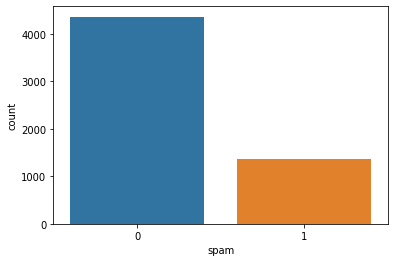

In [ ]:
sns.countplot(mail['spam'])

In [ ]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)
    mail['count']=mail['text'].apply(count_words)

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
def process_text(text):
    no_punc = [char for char in text if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    
    return ' '.join([word for word in no_punc.split() if word.lower() not in stopwords.words('english')])

In [ ]:

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
mail['text']=mail['text'].apply(process_text)

In [ ]:
mail['text']

0       Subject naturally irresistible corporate ident...
1       Subject stock trading gunslinger fanny merrill...
2       Subject unbelievable new homes made easy im wa...
3       Subject 4 color printing special request addit...
4       Subject money get software cds software compat...
                              ...                        
5723    Subject research development charges gpg forwa...
5724    Subject receipts visit jim thanks invitation v...
5725    Subject enron case study update wow day super ...
5726    Subject interest david please call shirley cre...
5727    Subject news aurora 5 2 update aurora version ...
Name: text, Length: 5728, dtype: object

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

In [ ]:
mail['text']=mail['text'].apply(stemming)

In [ ]:
mail.head()

,text,spam
0,Subject naturally irresistible corporate ident...,1
1,Subject stock trading gunslinger fanny merrill...,1
2,Subject unbelievable new homes made easy im wa...,1
3,Subject 4 color printing special request addit...,1
4,Subject money get software cds software compat...,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
message_bow = vectorizer.fit_transform(mail['text'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(message_bow,mail['spam'],test_size=0.20)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb= MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       861
           1       0.97      0.99      0.98       285

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



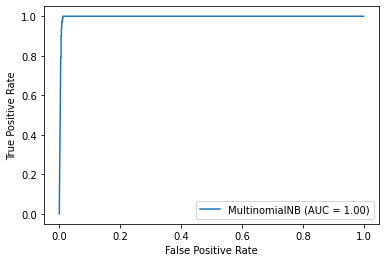

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(nb,X_test,y_test)

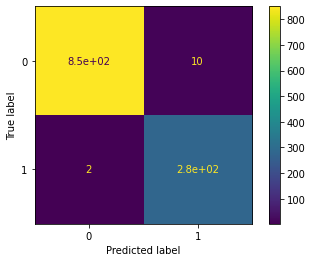

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb,X_test,y_test)

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5,shuffle=True)
print("Accuracy using Cross Validation is :",np.mean(cross_val_score(nb,message_bow,mail['spam'],cv=kfold,scoring="accuracy"))*100," %")

Accuracy using Cross Validation is : 99.00493076354435  %
